# Toy Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

Preparing the dataset

In [4]:
df = pd.read_csv("S&P.csv")

df['Close-Open'] = df.Close - df.Open
df['High-Low'] = df.High - df.Low
df['Diff'] = df.Close.diff(1)
df['PCC'] = df.Close.pct_change()

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Close-Open,High-Low,Diff,PCC
0,2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000,-1.630005,5.679932,NaN,NaN
1,2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,-9.840088,17.480103,-9.840088,-0.008119
2,2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,-14.029907,20.449951,-14.029907,-0.011671
3,2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,-4.310059,9.010009,-4.310059,-0.003628
4,2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,4.150025,8.359985,4.150025,0.003506


In [15]:
X = df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Close-Open,High-Low,Diff,PCC
1,2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,-9.840088,17.480103,-9.840088,-0.008119
2,2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,-14.029907,20.449951,-14.029907,-0.011671
3,2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,-4.310059,9.010009,-4.310059,-0.003628
4,2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,4.150025,8.359985,4.150025,0.003506
5,2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000,-1.700074,10.039917,-1.700074,-0.001431


In [ ]:
X = X.drop(['Date'], axis =1)

In [22]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,0) #-1
y = y[1:]

Compare the lentgh of X and y

In [23]:
print(len(X), len(y))

3272 3272


In [24]:
sc = StandardScaler()
sc.fit(X)            
X = sc.transform(X) 

Feature ranking:
1. feature 5 (0.114533)
2. feature 7 (0.111728)
3. feature 6 (0.104718)
4. feature 8 (0.103315)
5. feature 9 (0.102840)
6. feature 1 (0.093763)
7. feature 2 (0.093467)
8. feature 0 (0.092045)
9. feature 4 (0.091837)
10. feature 3 (0.091754)


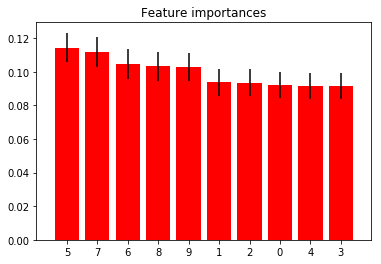

In [25]:
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 10000, n_jobs=-1, random_state=0) 
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Creating dataset from scratch 

In [53]:
X = df.dropna()

In [54]:
X = X.drop(['Date'], axis = 1)
X = X.drop(['Open'], axis = 1)
X = X.drop(['Low'], axis = 1)
X = X.drop(['High'], axis = 1)
X = X.drop(['Close'], axis = 1)
X = X.drop(['Adj Close'], axis = 1)
X = X.drop(['Close-Open'], axis = 1)

In [55]:
X.head(3)

,Volume,High-Low,Diff,PCC
1,1510800000,17.480103,-9.840088,-0.008119
2,1721000000,20.449951,-14.029907,-0.011671
3,1738900000,9.010009,-4.310059,-0.003628


In [56]:
sc = StandardScaler()
sc.fit(X)            
X = sc.transform(X) 

In [57]:
split_percentage = 0.8
split = int(split_percentage*len(X))
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]

In [58]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter = 1000, activation = 'relu')
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print('Accuracy: % .2f' % accuracy_score(y_test, y_pred_test))

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print(CM)

Accuracy:  0.53
[[ 22 287]
 [ 24 322]]
